# <span style="color:red"> Assignment - 2   Question - 2 </span> 

In [38]:
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from numpy.random import seed 
from numpy.random import randint 

##  Part 1

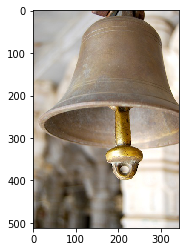

In [52]:
bell=cv.imread('../images/bell.jpg',1)
bell=cv.cvtColor(bell,cv.COLOR_BGR2RGB)
plt.imshow(bell)

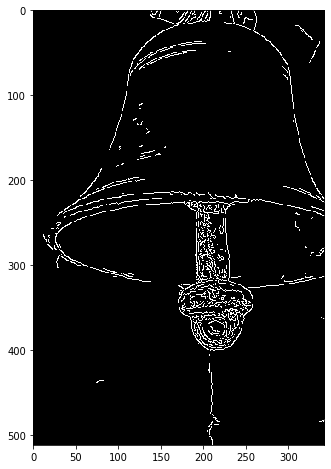

In [53]:
plt.figure(figsize=(12,8))
bell_Cannyfilter = cv.Canny(bell, 100, 150)
# bell_Cannyfilter = cv.Canny(bell, 50, 180)
plt.imshow(bell_Cannyfilter, cmap = "gray")

* The values that give the best results for each image are **minVal= 100** and **maxVal =150**

In [54]:
# bell_Cannyfilter = cv.Canny(kob, 100, 160)
# plt.imshow(bell_Cannyfilter, cmap = "gray")

##  Part 2

In [55]:
def filter_2D(img1,kernel):
    img=np.copy(img1)
    img = img.astype('float32')
    k=kernel.shape[0]
    out_img=np.zeros_like(img)
    row,col,ch=img.shape
    if(k==2):
        img_pad= np.zeros((row+ 2,col + 2,ch))
    else:
        img_pad= np.zeros((row+ k-1,col + k-1,ch))
    upper_zero_cnt=k/2
    u=int(upper_zero_cnt)
    if(u!=0):
        img_pad[u:-u, u:-u,0] = img[:,:,0]
        img_pad[u:-u, u:-u,1] = img[:,:,1]
        img_pad[u:-u, u:-u,2] = img[:,:,2]
    for c in range(ch):
        for i in range(row):
            for j in range(col):
                out_img[i,j,c]= np.sum(np.multiply(img_pad[i:i+k,j:j+k,c],kernel))
    if (kernel.sum()!=0):
        out_img/=kernel.sum()
    out_img = np.clip(out_img,0,255)
    return out_img.astype(np.uint16)

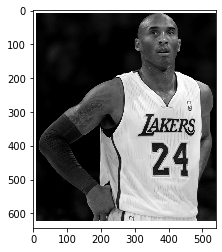

In [56]:
kob=cv.imread('../images/kobe.png',1)
kob=cv.cvtColor(kob,cv.COLOR_BGR2RGB)
plt.imshow(kob)

Text(0.5, 1.0, 'Canny Edge Detection')

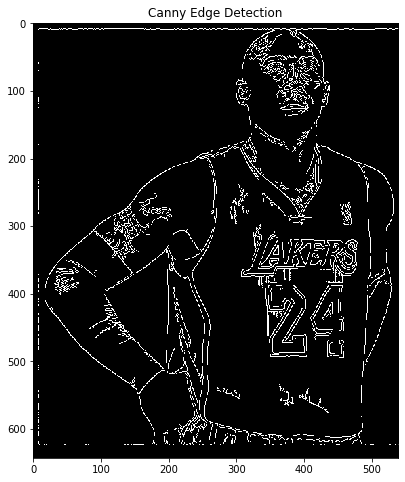

In [51]:
plt.figure(figsize=(12,8))
Kob_Cannyfilter = cv.Canny(kob, 50, 180)
plt.imshow(Kob_Cannyfilter,cmap="gray")
plt.title("Canny Edge Detection")

In [45]:
prewitt_mx = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitt_my = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

sobel_mx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_my = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

roberts_mx = np.array([[0,1],[-1,0]])
roberts_my = np.array([[1,0],[0,-1]])

laplacian1 = np.array([[0,1,0],[1,-4,1],[0,1,0]])
laplacian2 = np.array([[1,1,1],[1,-8,1],[1,1,1]])

Text(0.5, 1.0, 'Prewitt Combined Output')

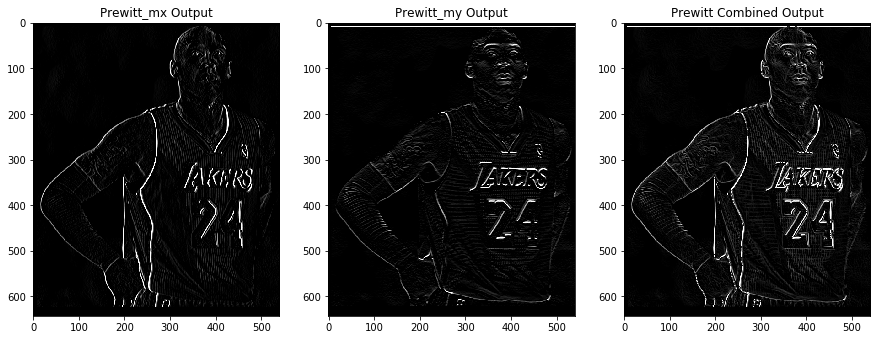

In [46]:
px=filter_2D(kob,prewitt_mx)
py=filter_2D(kob,prewitt_my)
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(px)
axarr[1].imshow(py)
axarr[2].imshow((np.sqrt(px**2 + py**2)).astype(np.uint8))
axarr[0].set_title("Prewitt_mx Output")
axarr[1].set_title("Prewitt_my Output")
axarr[2].set_title("Prewitt Combined Output")

Text(0.5, 1.0, 'Sobel Combined Output')

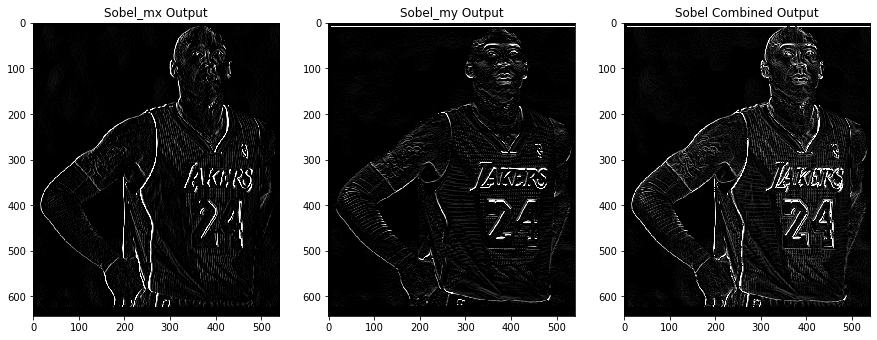

In [10]:
sx=filter_2D(kob,sobel_mx)
sy=filter_2D(kob,sobel_my)
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(sx)
axarr[1].imshow(sy)
axarr[2].imshow((np.sqrt(sx**2 + sy**2)).astype(np.uint8))
axarr[0].set_title("Sobel_mx Output")
axarr[1].set_title("Sobel_my Output")
axarr[2].set_title("Sobel Combined Output")

Text(0.5, 1.0, 'Laplacian2 Output')

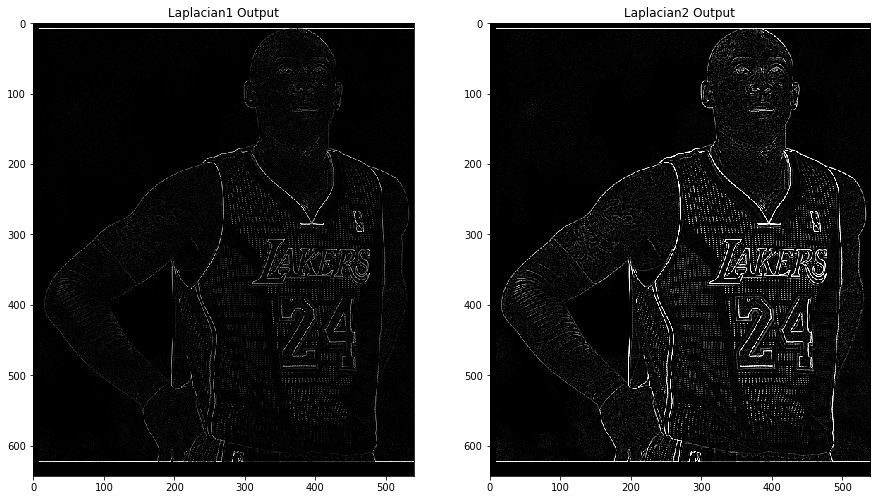

In [11]:
l1=filter_2D(kob,laplacian1)
l2=filter_2D(kob,laplacian2)
f, axarr = plt.subplots(1,2,figsize=(15,10))
axarr[0].imshow(l1)
axarr[1].imshow(l2)
axarr[0].set_title("Laplacian1 Output")
axarr[1].set_title("Laplacian2 Output")

Text(0.5, 1.0, 'Robert Combined Output')

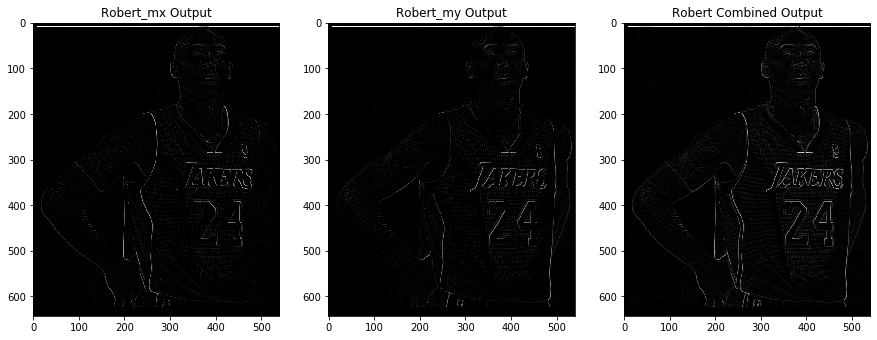

In [12]:
rx=filter_2D(kob,roberts_mx)
ry=filter_2D(kob,roberts_my)
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(rx)
axarr[1].imshow(ry)
axarr[2].imshow((np.sqrt(rx**2 + ry**2)).astype(np.uint8))
axarr[0].set_title("Robert_mx Output")
axarr[1].set_title("Robert_my Output")
axarr[2].set_title("Robert Combined Output")

### Observations upon comparing their outputs :-
* Canny Edge gives better edge detection compared to all other filters because of its preprocessing functionality which removes noise and detects edges accurately.
* x parts of Prewitt and Sobel detected vertical edges and their y parts detected horizontal edges. 
* Sobel because of the higher pixel value in the centre compared to end highlights the edges. It has a higher spectoral response thus giving an idea of the edge magnitude. These can also detect diagonal/curvy edges.
* Laplacian also follows the same thing. It also detects diagonal edges.
* Roberts filters on the other hand detect only diagonal edges.
* Other than Laplacian, other filters fail to detect the long right edge
* By observation after Canny, Sobel and Laplacian2 performs the best.

## Part 4

In [47]:
prewitt_mx5 = np.array([[9,9,9,9,9],[9,5,5,5,9],[-7,-3,0,-3,-7],[-7,-3,-3,-3,7],[-7,-7,-7,-7,-7]])
prewitt_my5 = np.array([[9,9,-7,-7,-7],[9,5,-3,-3,-7],[9,5,0,-3,-7],[9,5,-3,-3,-7],[9,9,-7,-7,-7]])

sobel_mx5 = np.array([[2,2,4,2,2],[1,1,2,1,1],[0,0,0,0,0],[-1,-1,-2,-1,-1],[-2,-2,-4,-2,-2]])
sobel_my5 = np.array([[2,1,0,-1,-2],[2,1,0,-1,-2],[4,2,0,-2,-4],[2,1,0,-1,-2],[2,1,0,-1,-2]])

Text(0.5, 1.0, 'Prewitt Combined Output')

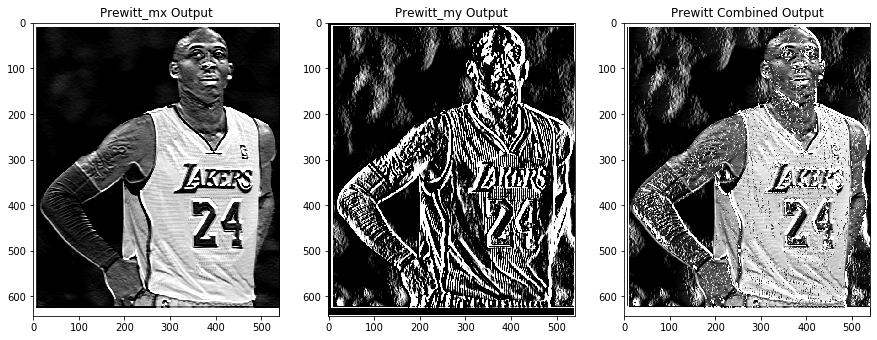

In [48]:
px5=filter_2D(kob,prewitt_mx5)
py5=filter_2D(kob,prewitt_my5)
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(px5)
axarr[1].imshow(py5)
axarr[2].imshow((np.sqrt(px5**2 + py5**2)).astype(np.uint8))
axarr[0].set_title("Prewitt_mx Output")
axarr[1].set_title("Prewitt_my Output")
axarr[2].set_title("Prewitt Combined Output")

Text(0.5, 1.0, 'Sobel Combined Output')

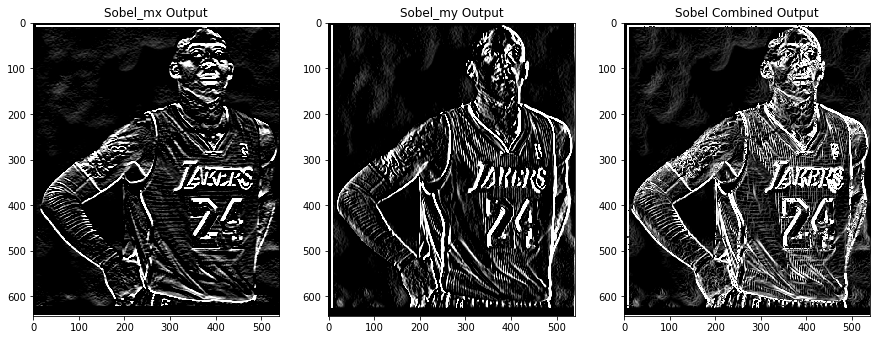

In [49]:
sx5=filter_2D(kob,sobel_mx5)
sy5=filter_2D(kob,sobel_my5)
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(sx5)
axarr[1].imshow(sy5)
axarr[2].imshow((np.sqrt(sx5**2 + sy5**2)).astype(np.uint8))
axarr[0].set_title("Sobel_mx Output")
axarr[1].set_title("Sobel_my Output")
axarr[2].set_title("Sobel Combined Output")

### Observations upon comparing their outputs :-
* 5x5 Prewitt operator will give us not good but smoothed gradient image
* Sobel gives better results because of the fact that far pixels in 5x5 window have less weights then pixels close to the  center, whereas for Prewitt filter, far pixesl in 5X5 window, they have higher or equal weight with center.
* Sobel 5X5 performs better than Sobel 3X3 because of better edge detection and appropriate pixel values at center and at the end.
* Prewitt 5X5 peforms worst than Prewitt 3X3, because inappropriate pixel values at the end(or far from center).

## Part 5

Text(0.5, 1.0, 'Noisy Image')

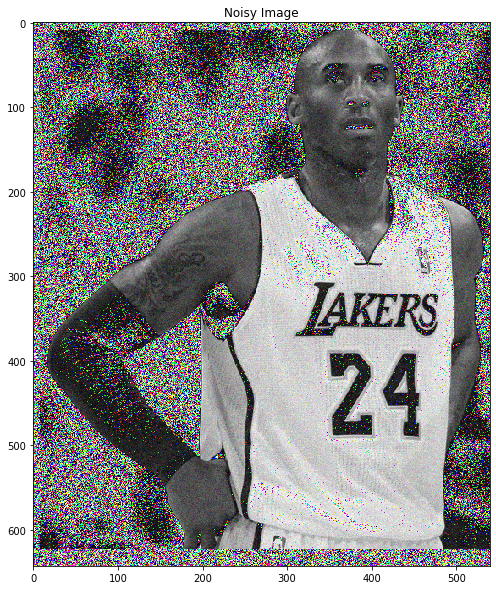

In [26]:
# Adding random noise using gaussian sampling
noisy_img = np.copy(kob)
noisy_img[:,:,0] = noisy_img[:,:,0] + 10*np.random.randn(int(kob.shape[0]),int(kob.shape[1]))
noisy_img[:,:,1] = noisy_img[:,:,1] + 10*np.random.randn(int(kob.shape[0]),int(kob.shape[1]))
noisy_img[:,:,2] = noisy_img[:,:,2] + 10*np.random.randn(int(kob.shape[0]),int(kob.shape[1]))
plt.figure(figsize=(15,10))
plt.imshow(noisy_img)
plt.title("Noisy Image")

Text(0.5, 1.0, 'Prewitt Combined Output')

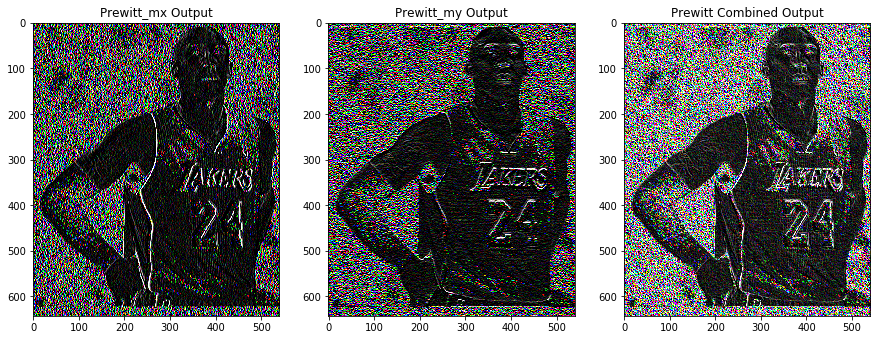

In [24]:
px=filter_2D(noisy_img,prewitt_mx)
py=filter_2D(noisy_img,prewitt_my)
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(px.astype(np.uint8))
axarr[1].imshow(py.astype(np.uint8))
axarr[2].imshow((np.sqrt(px**2 + py**2)).astype(np.uint8))
axarr[0].set_title("Prewitt_mx Output")
axarr[1].set_title("Prewitt_my Output")
axarr[2].set_title("Prewitt Combined Output")

Text(0.5, 1.0, 'Sobel Combined Output')

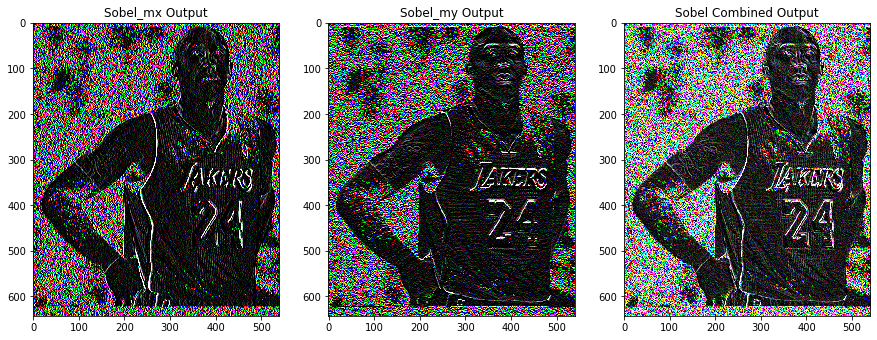

In [18]:
sx=filter_2D(noisy_img,sobel_mx)
sy=filter_2D(noisy_img,sobel_my)
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(sx)
axarr[1].imshow(sy)
axarr[2].imshow((np.sqrt(sx**2 + sy**2)).astype(np.uint8))
axarr[0].set_title("Sobel_mx Output")
axarr[1].set_title("Sobel_my Output")
axarr[2].set_title("Sobel Combined Output")

Text(0.5, 1.0, 'Laplacian2 Output')

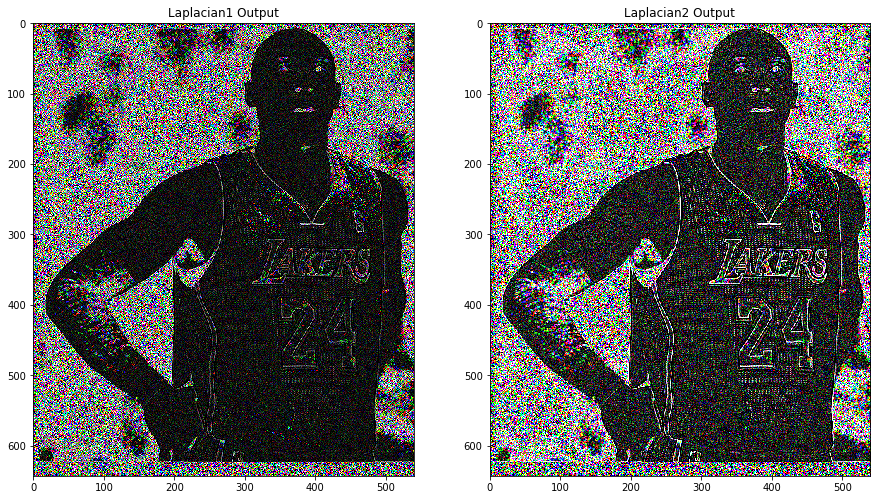

In [19]:
l1=filter_2D(noisy_img,laplacian1)
l2=filter_2D(noisy_img,laplacian2)
f, axarr = plt.subplots(1,2,figsize=(15,10))
axarr[0].imshow(l1)
axarr[1].imshow(l2)
axarr[0].set_title("Laplacian1 Output")
axarr[1].set_title("Laplacian2 Output")

Text(0.5, 1.0, 'Robert Combined Output')

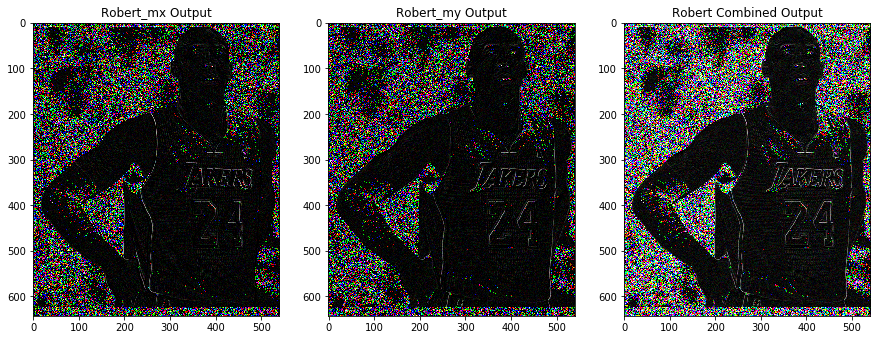

In [20]:
rx=filter_2D(noisy_img,roberts_mx)
ry=filter_2D(noisy_img,roberts_my)
f, axarr = plt.subplots(1,3,figsize=(15,10))
axarr[0].imshow(rx)
axarr[1].imshow(ry)
axarr[2].imshow((np.sqrt(rx**2 + ry**2)).astype(np.uint8))
axarr[0].set_title("Robert_mx Output")
axarr[1].set_title("Robert_my Output")
axarr[2].set_title("Robert Combined Output")

Text(0.5, 1.0, 'Canny Edge Detection')

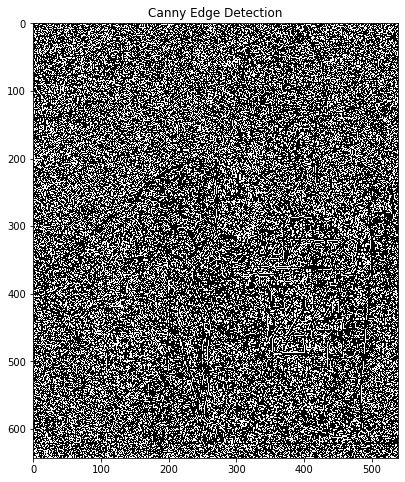

In [59]:
plt.figure(figsize=(12,8))
Kob_Cannyfilter = cv.Canny(noisy_img, 100,160)
plt.imshow(Kob_Cannyfilter,cmap="gray")
plt.title("Canny Edge Detection")

### The effect of applying given filters on noisy images are :-

* We can see the formation of some false edges. Especially in the right hand part of Kob image and left shoulder
* This is due to the fact that both edges and noise have high frequency components and in some of the cases like hand and shoulder mentioned above, the noisy image has false edges,hence those are replicated in the final output. 
* In scenarios where the filters are direction sensitive, if we have edges that have become curved due to noise, we can see their appearance in both x and y directions
* The detection of edges in noisy image are difficult because of the match of frequency of edges and noise, hence image preprocessing which involves cleaning should be performed to remove the noise components in image